# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     | Ana Sofía Hinojosa Bale  |
| **Fecha**      | 24 de agosto 2025        |
| **Expediente** | 742594                   |

## Regresión polinomial

Observa la siguiente gráfica.

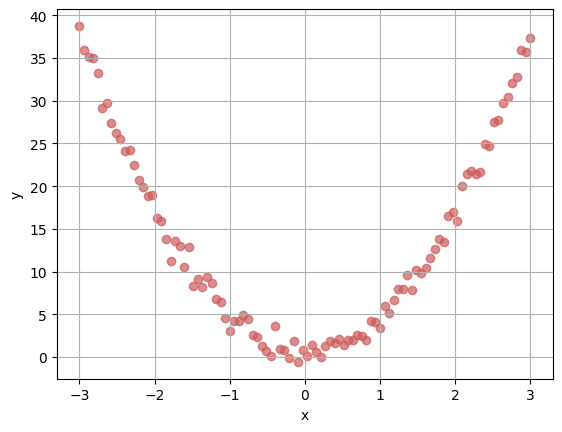

In [1]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y, color = "indianred", alpha = 0.7); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

In [3]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y);
lr.coef_, lr.intercept_

(array([-0.04955448]), np.float64(13.30223225795873))

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

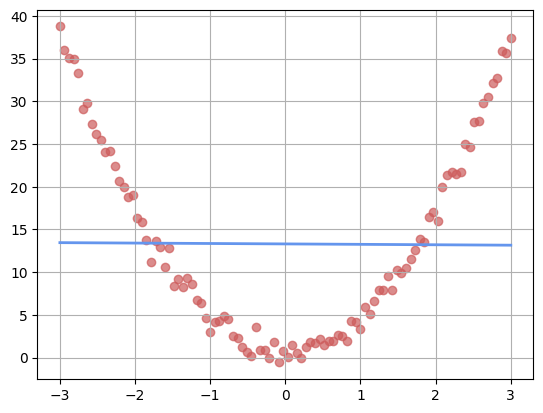

In [4]:
plt.scatter(x, y, color="indianred", alpha = 0.7)
plt.plot(x, lr.predict(x.reshape(-1, 1)), color="cornflowerblue", linewidth=2)
plt.grid()

In [5]:
r2_score(y, lr.predict(x.reshape(-1, 1)))

5.80345273922811e-05

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [6]:
x_2 = np.vstack((x, x**2)).T
lr2 = LinearRegression()
lr2.fit(x_2.reshape(-1, 2), y);
lr2.coef_, lr2.intercept_

(array([-0.04955448,  4.14388884]), np.float64(0.6194209631804846))

In [7]:
r2_score(y, lr2.predict(x_2))

0.9934118040713642

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

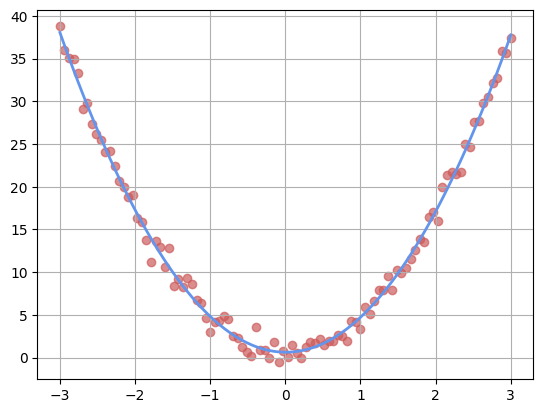

In [8]:
plt.scatter(x, y, color="indianred", alpha=0.7)
plt.plot(x, lr2.predict(x_2), color="cornflowerblue", linewidth=2)
plt.grid()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [9]:
def reg(n, x, y):
    x_n = np.vstack([x**i for i in range(1, n+1)]).T
    lr = LinearRegression()
    linr = lr.fit(x_n, y)
    r2 = r2_score(y, linr.predict(x_n))
    return r2, linr

In [10]:
n_grados = [3, 5, 7, 9, 11]

In [11]:
r2s = pd.DataFrame({
    "Grado": n_grados,
    "r2": [reg(n, x, y)[0] for n in n_grados]
})
r2s

,Grado,r2
0,3,0.993413
1,5,0.993495
2,7,0.993509
3,9,0.993514
4,11,0.993534


Crea una gráfica por cada modelo con las observaciones y su curva.

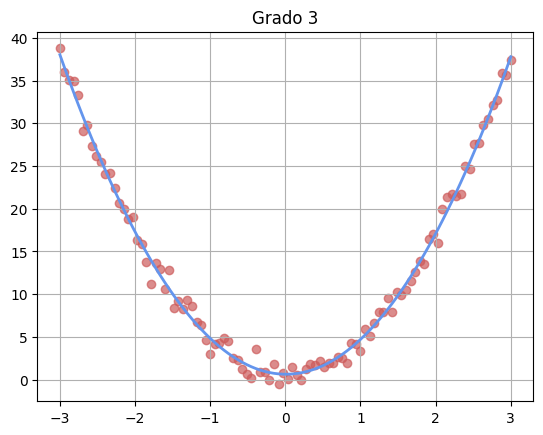

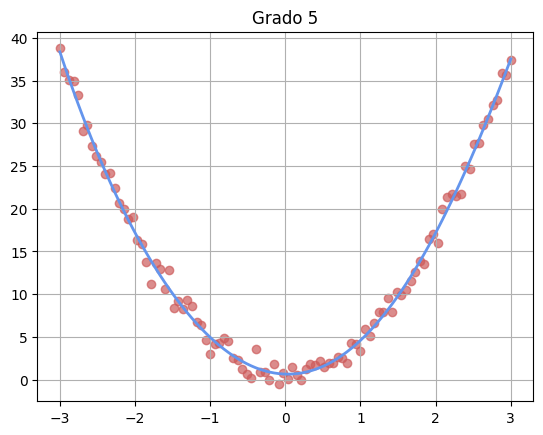

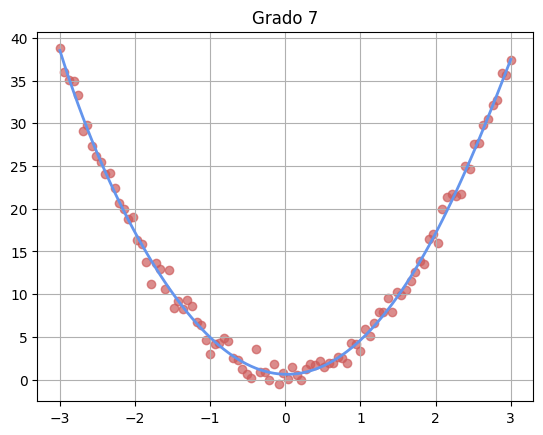

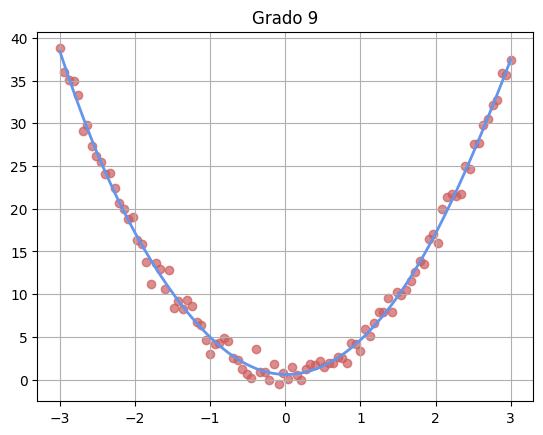

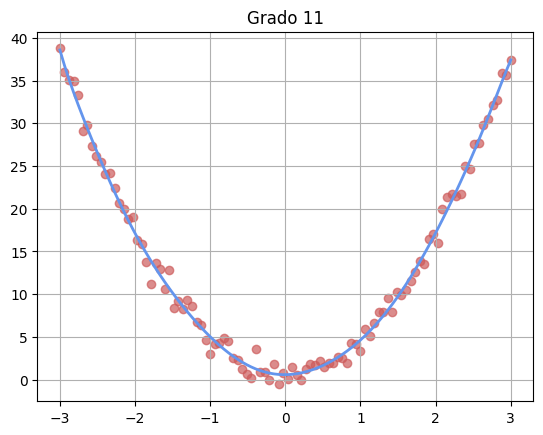

In [12]:
def grafica_con_reg(n, x, y):
    modelo = reg(n, x, y)[1]
    x_n = np.vstack([x**i for i in range(1, n+1)]).T
    plt.scatter(x, y, color="indianred", alpha=0.7)
    plt.plot(x, modelo.predict(x_n), color="cornflowerblue", linewidth=2)
    plt.title(f"Grado {n}")
    plt.grid()
    plt.show()

for n in n_grados:
    grafica_con_reg(n, x, y)

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

In [13]:
grado_max = r2s.loc[r2s['r2'].idxmax(), 'Grado']
r2_max = r2s['r2'].max()
grado_max, r2_max

(np.int64(11), np.float64(0.9935338704150221))

Aunque el modelo que tiene el mayor $R^2$ es el de **grado 11**, con el 99.3534% de la variabilidad de $y$ explicada por el modelo, esto no necesariamente implica que sea el mejor modelo, ya que este se ajusta demasido a los datos, causando overfitting y perdiendo capacidad de generalización. Por otro lado, como ose puede ver en el dataframe detallando los distintos $R^2$, las diferencias son mínimas, por lo que un modelo de grado más bajo, como el modelo de **grado 3** resulta el que mejor predicción provee.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [14]:
x_nueva = [5, 5 ** 2]
x_nueva = np.array(x_nueva).reshape(-1, 1)

In [15]:
x_val = 5
grados = [2, 3, 5, 7, 9, 11]
resultados = []

for n in [2, 3, 5, 7, 9, 11]:
    r2, modelo = reg(n, x, y)
    x_nueva = np.array([x_val**i for i in range(1, n+1)]).reshape(1, -1)
    y_pred = modelo.predict(x_nueva)[0]
    resultados.append(y_pred)

resultados_5 = pd.DataFrame({
    "Grado": grados,
    "Predicción en x=5": resultados
})

In [16]:
resultados_5

,Grado,Predicción en x=5
0,2,103.968870
1,3,104.252324
2,5,84.598950
3,7,33.743218
4,9,215.736379
5,11,-5265.344254


¿Cuál modelo crees que sea mejor?

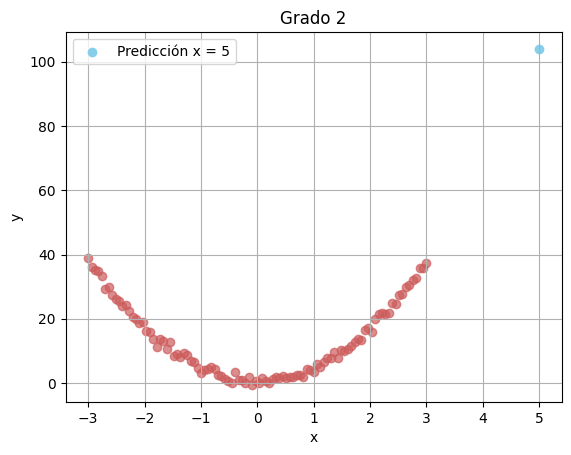

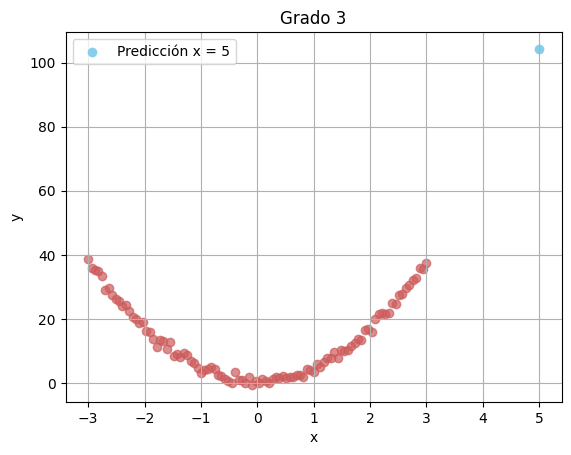

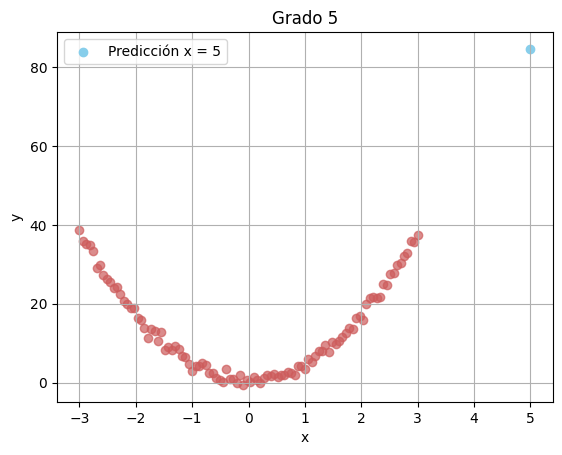

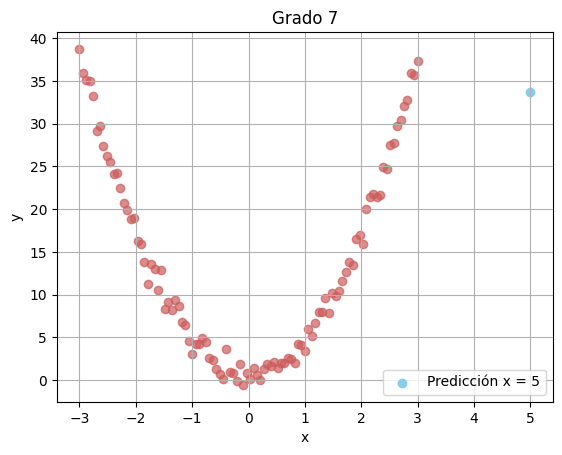

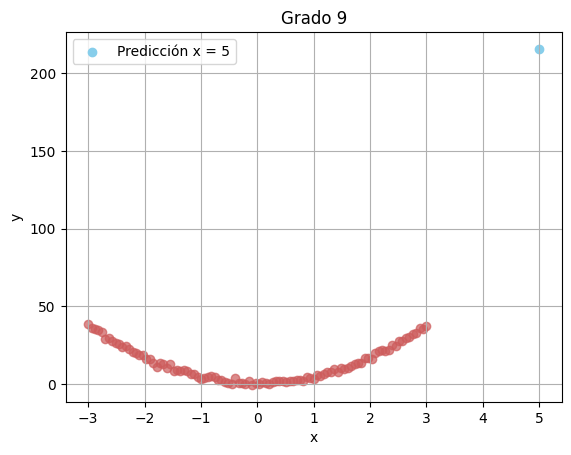

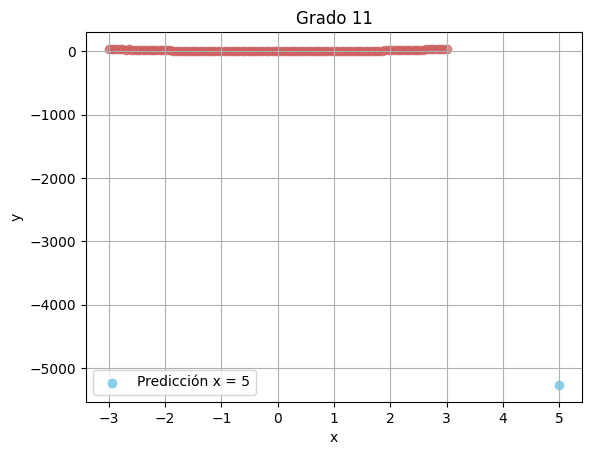

In [17]:
for i in grados:
    plt.scatter(x, y, color="indianred", alpha=0.7)
    plt.scatter(5, resultados_5.loc[resultados_5['Grado'] == i, 'Predicción en x=5'], color="skyblue", label=f"Predicción x = 5")
    plt.title(f"Grado {i}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.grid()
    plt.legend()
    plt.show()

Como se puede observar en las gráficas anteriores, los modelos de grado 2 y 3 son los que mejor se ajustan a los datos. Esto se debe a que ambos modelos logran capturar la tendencia cuadrática que existe en la relación entre las variables, ya que el comportamiento de los datos sigue una parábola y no una línea recta. 

El modelo de grado 2 incorpora el término $x^2$, lo que permite que la curva se adapte de manera natural a la forma de los datos, explicando la mayor parte de la variabilidad observada. El modelo de grado 3, aunque incluye un término cúbico, también se ajusta bien porque el término cuadrático sigue siendo dominante en la relación.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3